In [1]:
library(dplyr)   
library(caret)
library(tidyverse)
library(recipes)
library(pROC)
library(caTools)
library(UBL)

options(repr.plot.width = 20, repr.plot.height =10, repr.plot.res = 100)


load(file = "C:/Users/abonini/Desktop/Analysis/Sources/LIVERTRANSPLANT/Modello/df.Rdata")

Warning message:
"package 'dplyr' was built under R version 3.6.3"

Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Warning message:
"package 'caret' was built under R version 3.6.3"
Loading required package: lattice

Warning message:
"package 'lattice' was built under R version 3.6.2"
Loading required package: ggplot2

Warning message:
"package 'tidyverse' was built under R version 3.6.3"
-- Attaching packages ------------------------------------------------------------------------------- tidyverse 1.3.0 --

v tibble  3.1.0     v purrr   0.3.4
v tidyr   1.1.2     v stringr 1.4.0
v readr   1.4.0     v forcats 0.5.1

Warning message:
"package 'tibble' was built under R version 3.6.2"
Warning message:
"package 'tidyr' was built under R version 3.6.3"
Warning message:
"package 'readr' was built under R version 3.6.3"
Warning message:
"pack

In [2]:
tmp <- subset(df, select = -c(deg_cat))           #hot encoding

#define one-hot encoding function
dummy <- dummyVars(" ~ .", data=tmp)

#perform one-hot encoding on data frame
final_df <- data.frame(predict(dummy, newdata=tmp))


final_df$deg_cat <- df$deg_cat


df <- final_df

## Data partition

In [3]:
#make this example reproducible
set.seed(1)

#use 70% of dataset as training set and 30% as test set
sample <- sample.split(df$deg_cat, SplitRatio = 0.7)
train  <- subset(df, sample == TRUE)
test   <- subset(df, sample == FALSE)


TestClasses <- test$deg_cat
TestData <- subset(test,select= -deg_cat)

In [4]:
train <- SmoteClassif(deg_cat ~ ., train, k = 27, dist = "HEOM")

#view distribution of response variable in new dataset
table(train$deg_cat)

TrainClasses <- train$deg_cat
TrainData <- subset(train,select= -deg_cat)


Accettabile  Complicato      Ottimo 
        249         249         249 

## Models

In [5]:
ctrl <- trainControl(method = "repeatedcv", 
                 number = 10, 
                 savePredictions = "final",classProbs=TRUE,verboseIter=TRUE, search= "random") 

#summaryFunction = multiClassSummary (to keep all metrics)

In [6]:

model_svmMlp <- train(x=TrainData, y=TrainClasses, 
               method = "monmlp") 

** Ensemble 1 
Complex eigenvalues found for method = BFGS 
coefficients for function value 0.5814373  :
  [1]  7.438646e+01  3.356801e+01  2.706305e+02  2.970985e+02  5.073766e+02
  [6] -9.380704e+01 -5.639840e+02  8.779682e+01 -8.780840e+01  1.618919e+02
 [11] -4.832697e+00  2.262415e+02 -4.698472e+01 -2.950719e+01  7.105531e+01
 [16] -7.104029e+01 -1.365359e+02  2.018174e+02 -6.093575e+00 -7.909319e+01
 [21]  1.895969e+02 -1.896335e+02  7.546378e+01 -6.429130e+01 -4.018153e+01
 [26]  7.824995e+01 -7.824205e+01  4.030962e-02 -1.612069e+02  1.103466e+02
 [31] -2.012944e+02  3.303239e+01  1.259173e+02 -1.896368e+02  1.896314e+02
 [36] -2.870025e+02  2.870431e+02  7.876116e+00 -7.890376e+00 -1.914388e+00
 [41]  1.498103e+02 -2.878629e-02  8.076816e+01 -2.644465e+02  4.614212e+01
 [46] -4.617783e+01  3.662192e+02  2.301169e+02  6.676201e+01 -2.821469e+02
 [51] -5.008696e+02 -1.548700e+02  2.001261e+02 -1.693218e+02 -1.213588e+01
 [56]  7.364424e+01 -1.108957e+02 -1.436718e+02 -3.333905e+

In [7]:

model_svmMlpW <- train(x=TrainData, y=TrainClasses, 
               method = "mlpWeightDecay") 

## Results

Monotone Multi-Layer Perceptron Neural Network 

747 samples
183 predictors
  3 classes: 'Accettabile', 'Complicato', 'Ottimo' 

No pre-processing
Resampling: Bootstrapped (25 reps) 
Summary of sample sizes: 747, 747, 747, 747, 747, 747, ... 
Resampling results across tuning parameters:

  hidden1  Accuracy   Kappa    
  1        0.5464422  0.3243444
  3        0.6233638  0.4347900
  5        0.6175307  0.4258509

Tuning parameter 'n.ensemble' was held constant at a value of 1
Accuracy was used to select the optimal model using the largest value.
The final values used for the model were hidden1 = 3 and n.ensemble = 1.


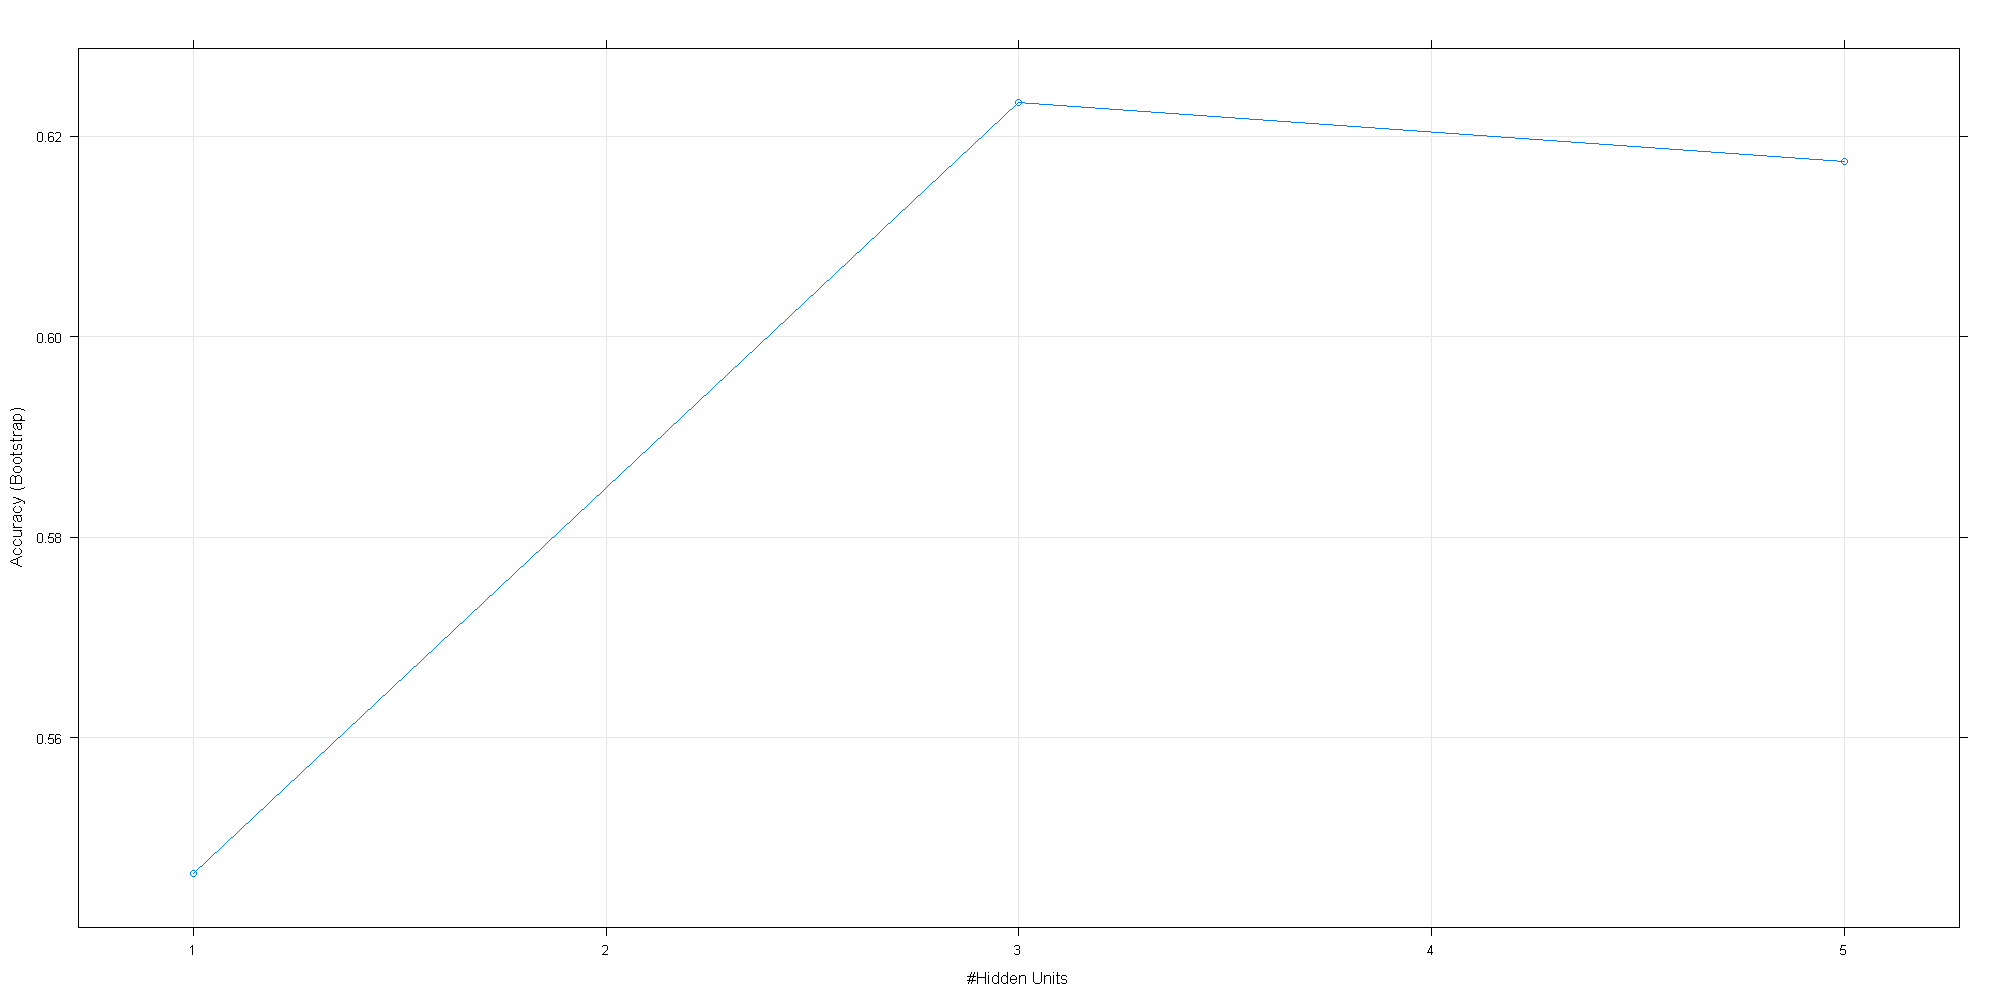

In [8]:
print(model_svmMlp)
plot(model_svmMlp)

Multi-Layer Perceptron 

747 samples
183 predictors
  3 classes: 'Accettabile', 'Complicato', 'Ottimo' 

No pre-processing
Resampling: Bootstrapped (25 reps) 
Summary of sample sizes: 747, 747, 747, 747, 747, 747, ... 
Resampling results across tuning parameters:

  size  decay  Accuracy   Kappa    
  1     0e+00  0.5777462  0.3693160
  1     1e-04  0.5836243  0.3777026
  1     1e-01  0.3275674  0.0000000
  3     0e+00  0.6315046  0.4464689
  3     1e-04  0.6121173  0.4177369
  3     1e-01  0.3301016  0.0000000
  5     0e+00  0.6356271  0.4528599
  5     1e-04  0.6275314  0.4402131
  5     1e-01  0.3265350  0.0000000

Accuracy was used to select the optimal model using the largest value.
The final values used for the model were size = 5 and decay = 0.


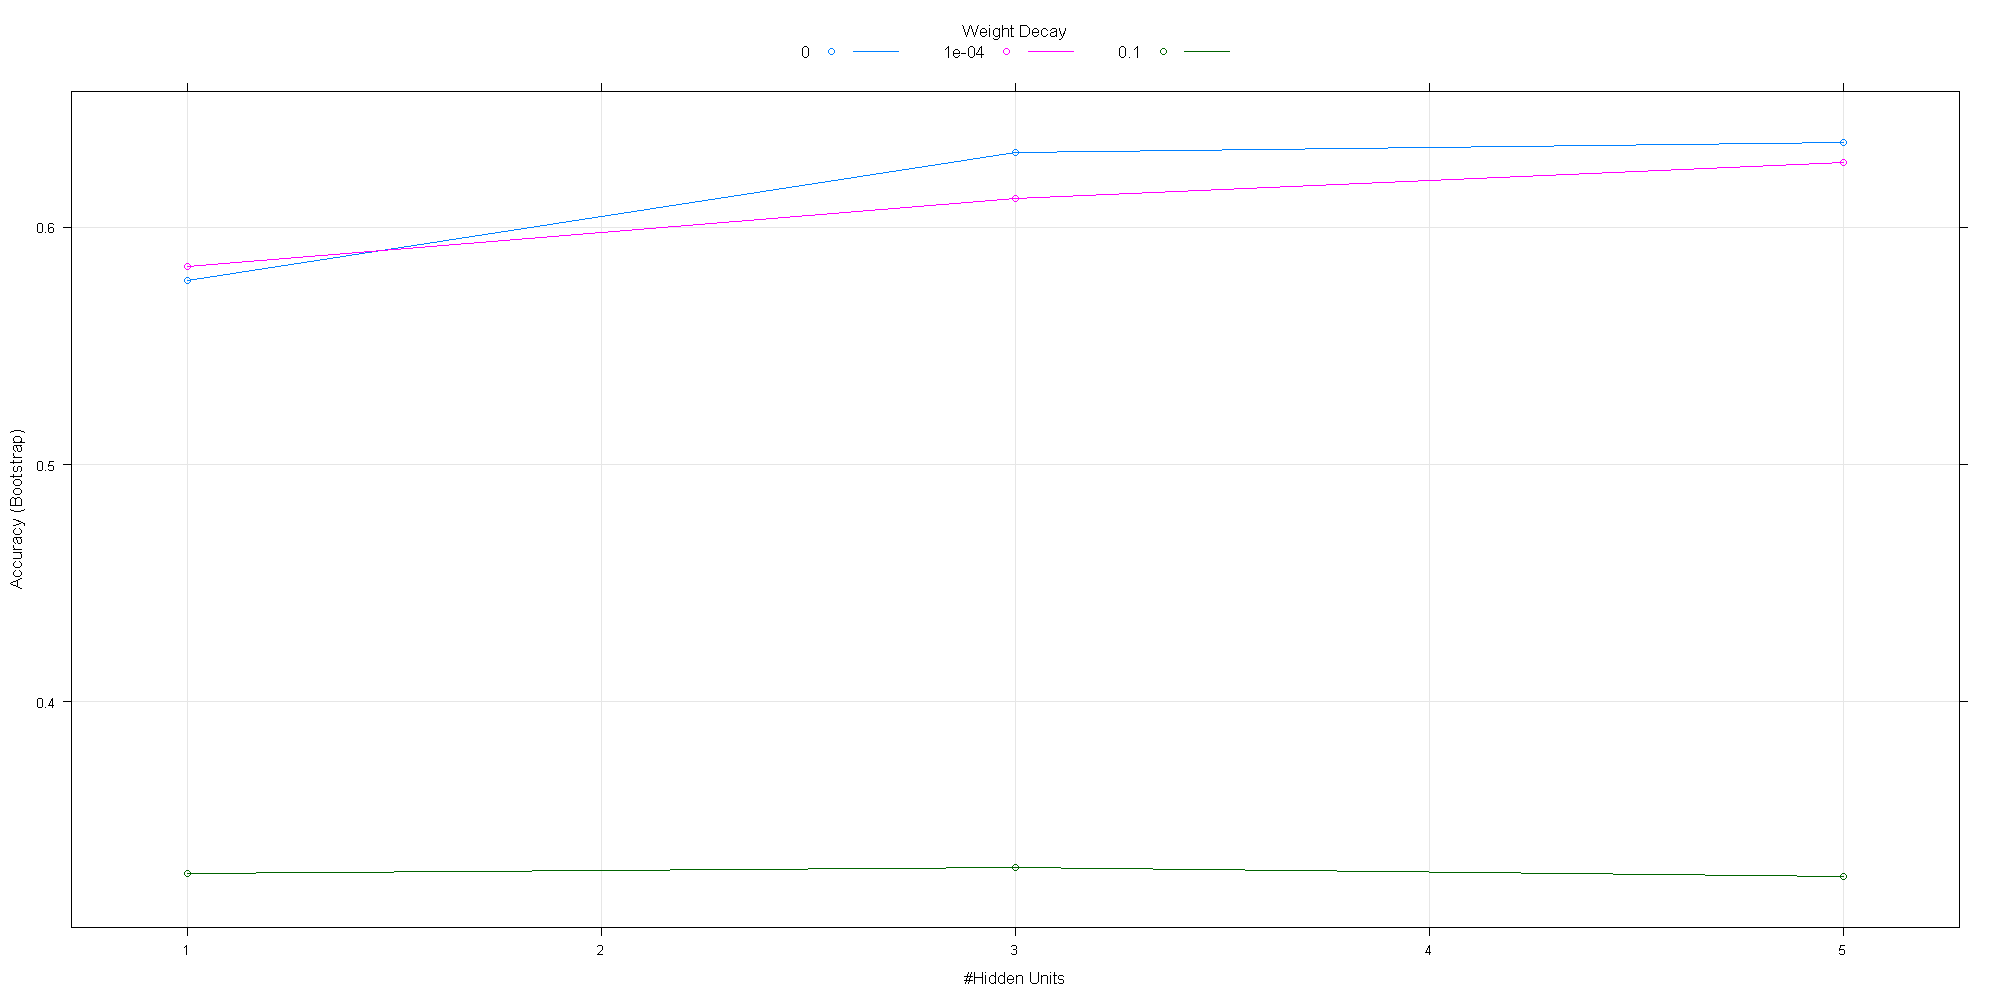

In [9]:
print(model_svmMlpW)
plot(model_svmMlpW)


Call:
summary.resamples(object = results)

Models: MLP, Weight 
Number of resamples: 25 

Accuracy 
            Min.   1st Qu.    Median      Mean   3rd Qu.      Max. NA's
MLP    0.5693950 0.6007463 0.6231884 0.6233638 0.6491228 0.6756757    0
Weight 0.5454545 0.6173285 0.6420664 0.6356271 0.6605839 0.7128028    0

Kappa 
            Min.   1st Qu.    Median      Mean   3rd Qu.      Max. NA's
MLP    0.3556351 0.4017732 0.4361815 0.4347900 0.4681149 0.5134192    0
Weight 0.3145083 0.4262496 0.4632458 0.4528599 0.4865263 0.5690287    0


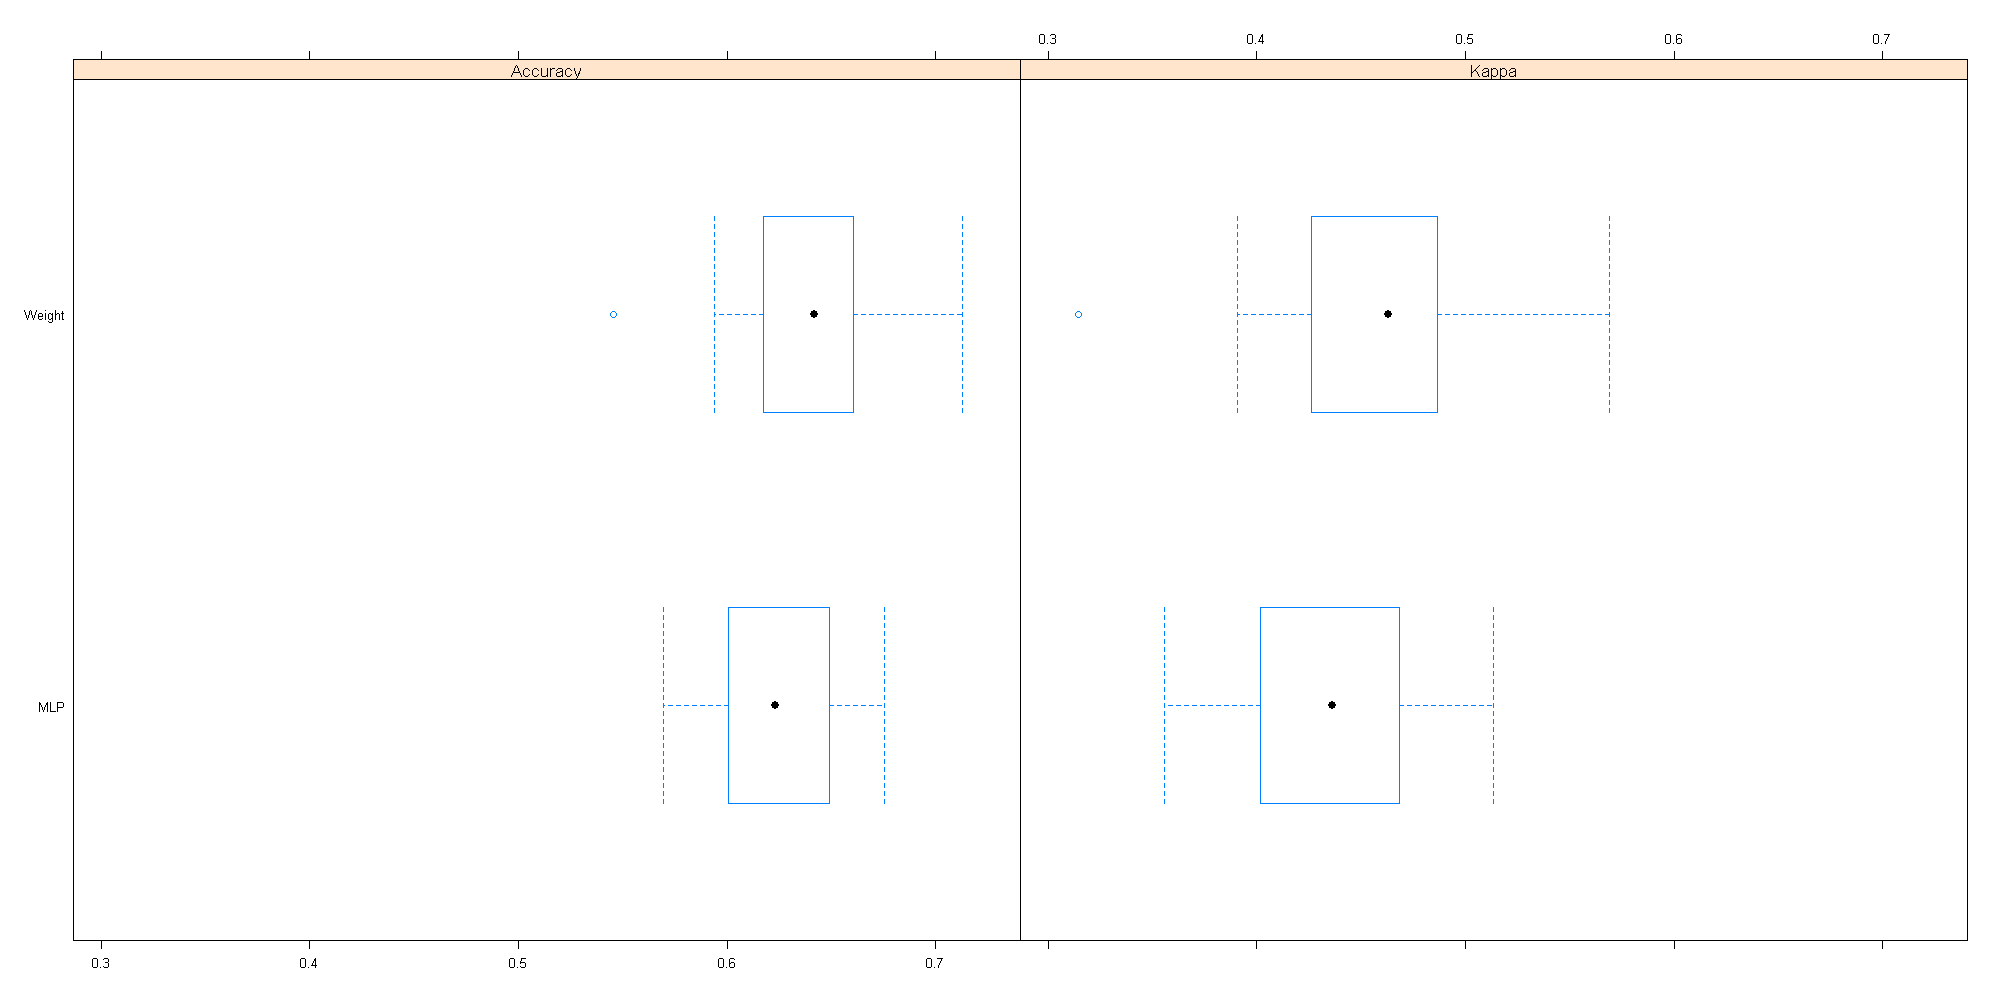

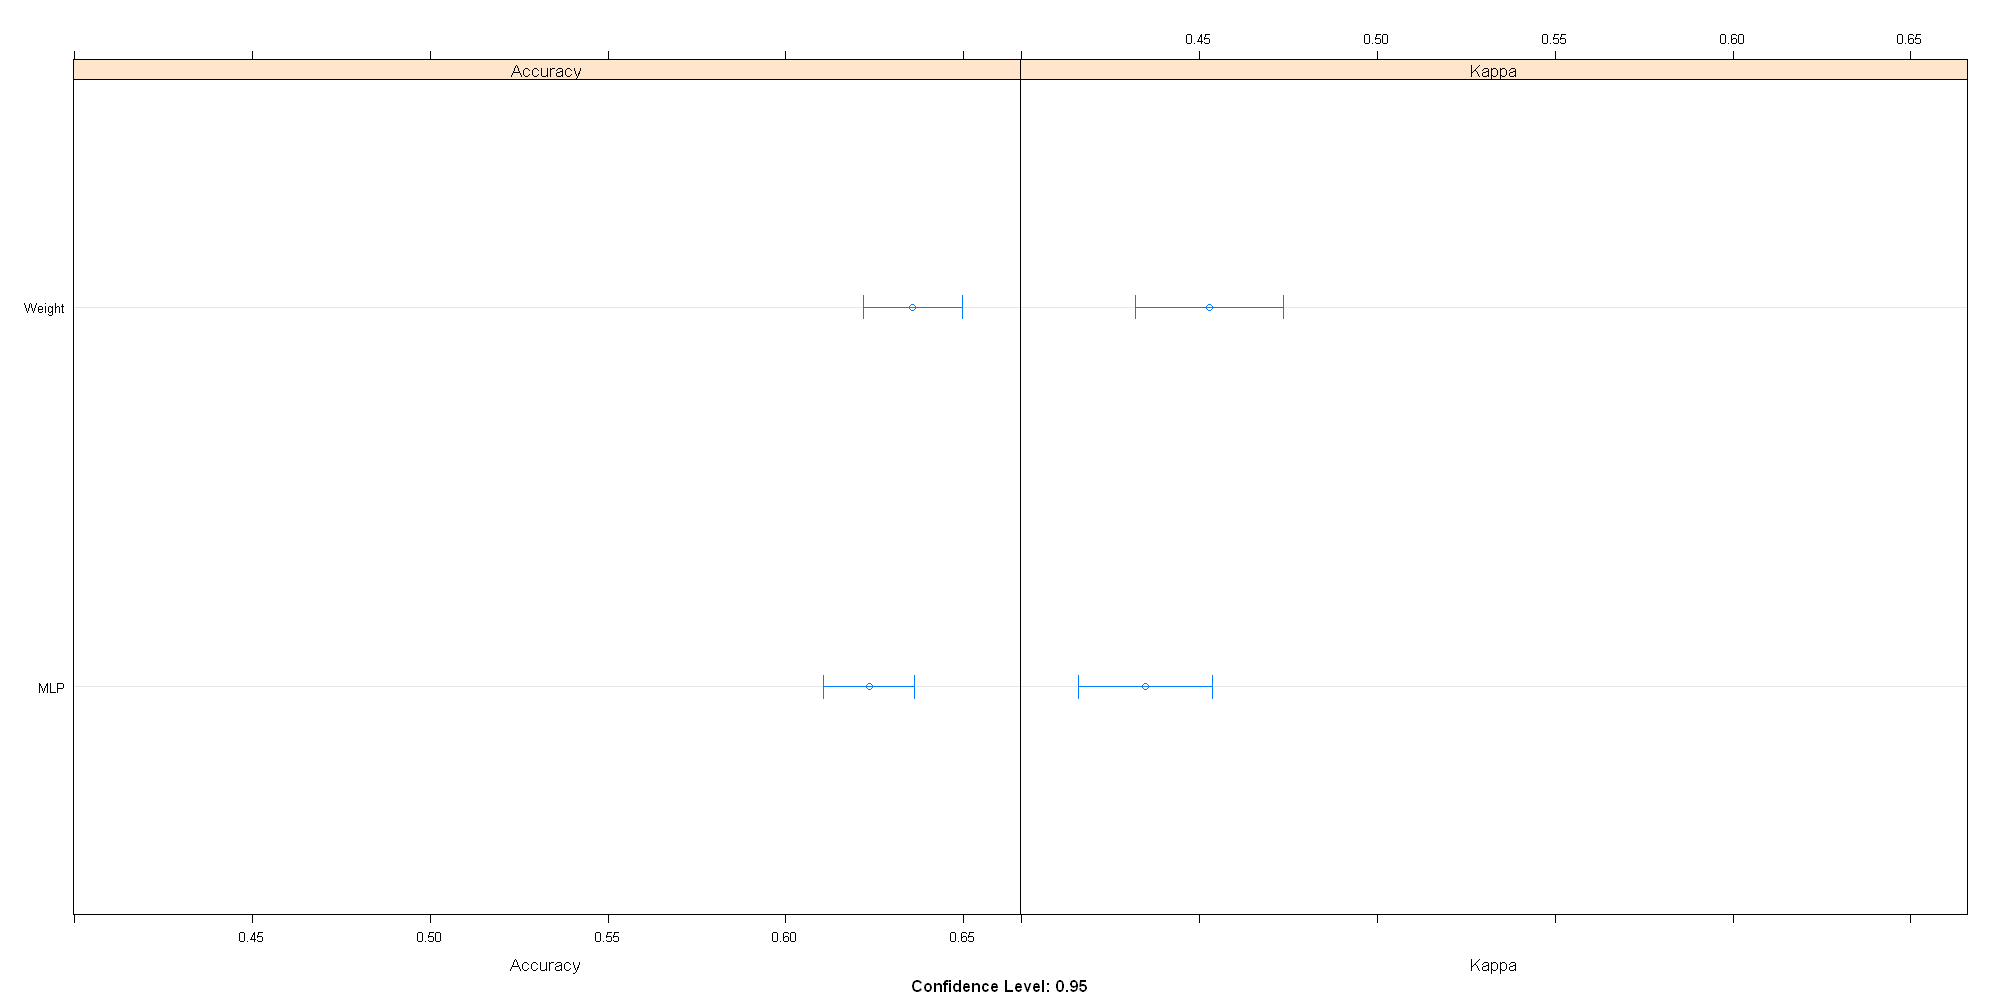

In [10]:
# collect resamples
results <- resamples(list(MLP=model_svmMlp,  Weight=model_svmMlpW))
# summarize the distributions
summary(results)
# boxplots of results
bwplot(results)
# dot plots of results
dotplot(results)

## Prediction

In [11]:
pred_svmMlpW <- predict(model_svmMlpW,TestData)
pred_svmMlpW.prob <- predict(model_svmMlpW,TestData, type="prob")


result <- confusionMatrix(TestClasses,  pred_svmMlpW) 
result
result$byClass

Confusion Matrix and Statistics

             Reference
Prediction    Accettabile Complicato Ottimo
  Accettabile          59         73     24
  Complicato           32         78     12
  Ottimo               14         11     18

Overall Statistics
                                        
               Accuracy : 0.4829        
                 95% CI : (0.427, 0.539)
    No Information Rate : 0.5047        
    P-Value [Acc > NIR] : 0.7987715     
                                        
                  Kappa : 0.1748        
                                        
 Mcnemar's Test P-Value : 0.0003177     

Statistics by Class:

                     Class: Accettabile Class: Complicato Class: Ottimo
Sensitivity                      0.5619            0.4815       0.33333
Specificity                      0.5509            0.7233       0.90637
Pos Pred Value                   0.3782            0.6393       0.41860
Neg Pred Value                   0.7212            0.5779       0.87

,Sensitivity,Specificity,Pos Pred Value,Neg Pred Value,Precision,Recall,F1,Prevalence,Detection Rate,Detection Prevalence,Balanced Accuracy
Class: Accettabile,0.5619048,0.5509259,0.3782051,0.7212121,0.3782051,0.5619048,0.4521073,0.3271028,0.18380062,0.4859813,0.5564153
Class: Complicato,0.4814815,0.7232704,0.6393443,0.5778894,0.6393443,0.4814815,0.5492958,0.5046729,0.24299065,0.3800623,0.6023760
Class: Ottimo,0.3333333,0.9063670,0.4186047,0.8705036,0.4186047,0.3333333,0.3711340,0.1682243,0.05607477,0.1339564,0.6198502


In [12]:
roc_svmMlpW <- multiclass.roc(TestClasses, as.numeric(pred_svmMlpW))
roc_svmMlpW

Setting direction: controls < cases

Setting direction: controls < cases

Setting direction: controls < cases




Call:
multiclass.roc.default(response = TestClasses, predictor = as.numeric(pred_svmMlpW))

Data: as.numeric(pred_svmMlpW) with 3 levels of TestClasses: Accettabile, Complicato, Ottimo.
Multi-class area under the curve: 0.5753

percent,FALSE,FALSE
sensitivities,"1.0000000, 0.6744186, 0.4186047, 0.0000000","1.0000000, 0.6744186, 0.4186047, 0.0000000"
specificities,"0.0000000, 0.3782051, 0.8461538, 1.0000000","0.0000000, 0.2622951, 0.9016393, 1.0000000"
thresholds,"-Inf, 1.5, 2.5, Inf","-Inf, 1.5, 2.5, Inf"
direction,<,<
cases,"3, 1, 3, 3, 2, 3, 3, 3, 3, 2, 2, 3, 1, 3, 1, 1, 2, 1, 1, 2, 2, 2, 2, 1, 3, 2, 3, 1, 1, 1, 3, 1, 1, 3, 2, 2, 3, 1, 3, 3, 3, 1, 3","3, 1, 3, 3, 2, 3, 3, 3, 3, 2, 2, 3, 1, 3, 1, 1, 2, 1, 1, 2, 2, 2, 2, 1, 3, 2, 3, 1, 1, 1, 3, 1, 1, 3, 2, 2, 3, 1, 3, 3, 3, 1, 3"
controls,"3, 2, 1, 1, 2, 3, 3, 3, 1, 3, 3, 1, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 3, 3, 3, 1, 2, 1, 3, 3, 3, 2, 1, 2, 2, 1, 3, 3, 1, 2, 1, 1, 2, 2, 1, 1, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 3, 2, 2, 3, 2, 3, 3, 2, 2, 3, 2, 2, 2, 1, 2, 2, 3, 1, 2, 1, 3, 1, 2, 2, 2, 1, 3, 3, 2, 1, 1, 2, 2, 1, 3, 2, 2, 1, 1, 2, 1, 1, 1, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 1, 2, 1","1, 2, 2, 2, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 3, 1, 2, 2, 2, 2, 1, 1, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 1, 1, 3, 2, 1, 2, 2, 3, 3, 2, 2, 3, 3, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1, 2, 1, 1, 1, 1, 2, 2, 3, 2, 1, 2, 2, 2, 3, 2, 3, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1"
fun.sesp,"function (thresholds, controls, cases, direction) , {, ncontrols <- length(controls), ncases <- length(cases), predictor <- c(controls, cases), response <- c(rep(0, length(controls)), rep(1, length(cases))), decr <- direction == ""<"", predictor.order <- order(predictor, decreasing = decr), predictor.sorted <- predictor[predictor.order], response.sorted <- response[predictor.order], tp <- cumsum(response.sorted == 1), fp <- cumsum(response.sorted == 0), se <- tp/ncases, sp <- (ncontrols - fp)/ncontrols, dups.pred <- rev(duplicated(rev(predictor.sorted))), dups.sesp <- duplicated(se) & duplicated(sp), dups <- dups.pred | dups.sesp, if (sum(!dups) != length(thresholds) - 1) {, sessionInfo <- sessionInfo(), save(thresholds, controls, cases, direction, sessionInfo, , file = ""pROC_bug.RData""), stop(sprintf(""pROC: fast algorithm computed an incorrect number of sensitivities and specificities. Diagnostic data saved in pROC_bug.RData. Please report this bug to <%s>."", , utils::packageDescription(""pROC"")$BugReports)), }, if (direction == ""<"") {, se <- rev(c(0, se[!dups])), sp <- rev(c(1, sp[!dups])), }, else {, se <- c(0, se[!dups]), sp <- c(1, sp[!dups]), }, return(list(se = se, sp = sp)), }","function (thresholds, controls, cases, direction) , {, ncontrols <- length(controls), ncases <- length(cases), predictor <- c(controls, cases), response <- c(rep(0, length(controls)), rep(1, length(cases))), decr <- direction == ""<"", predictor.order <- order(predictor, decreasing = decr), predictor.sorted <- predictor[predictor.order], response.sorted <- response[predictor.order], tp <- cumsum(response.sorted == 1), fp <- cumsum(response.sorted == 0), se <- tp/ncases, sp <- (ncontrols - fp)/ncontrols, dups.pred <- rev(duplicated(rev(predictor.sorted))), dups.sesp <- duplicated(se) & duplicated(sp), dups <- dups.pred | dups.sesp, if (sum(!dups) != length(thresholds) - 1) {, sessionInfo <- sessionInfo(), save(thresholds, controls, cases, direction, sessionInfo, , file = ""pROC_bug.RData""), stop(sprintf(""pROC: fast algorithm computed an incorrect number of sensitivities and specificities. Diagnostic data saved in pROC_bug.RData. Please report this bug to <%s>."", , utils::packageDescription(""pROC"")$BugReports)), }, if (direction == ""<"") {, se <- rev(c(0, se[!dups])), sp <- rev(c(1, sp[!dups])), }, else {, se <- c(0, se[!dups]), sp <- c(1, sp[!dups]), }, return(list(se = se, sp = sp)), }"
call,"roc.default(response = response, predictor = predictor, levels = X, , percent = percent, direction = ..1, auc = FALSE, ci = FALSE)","roc.default(respon

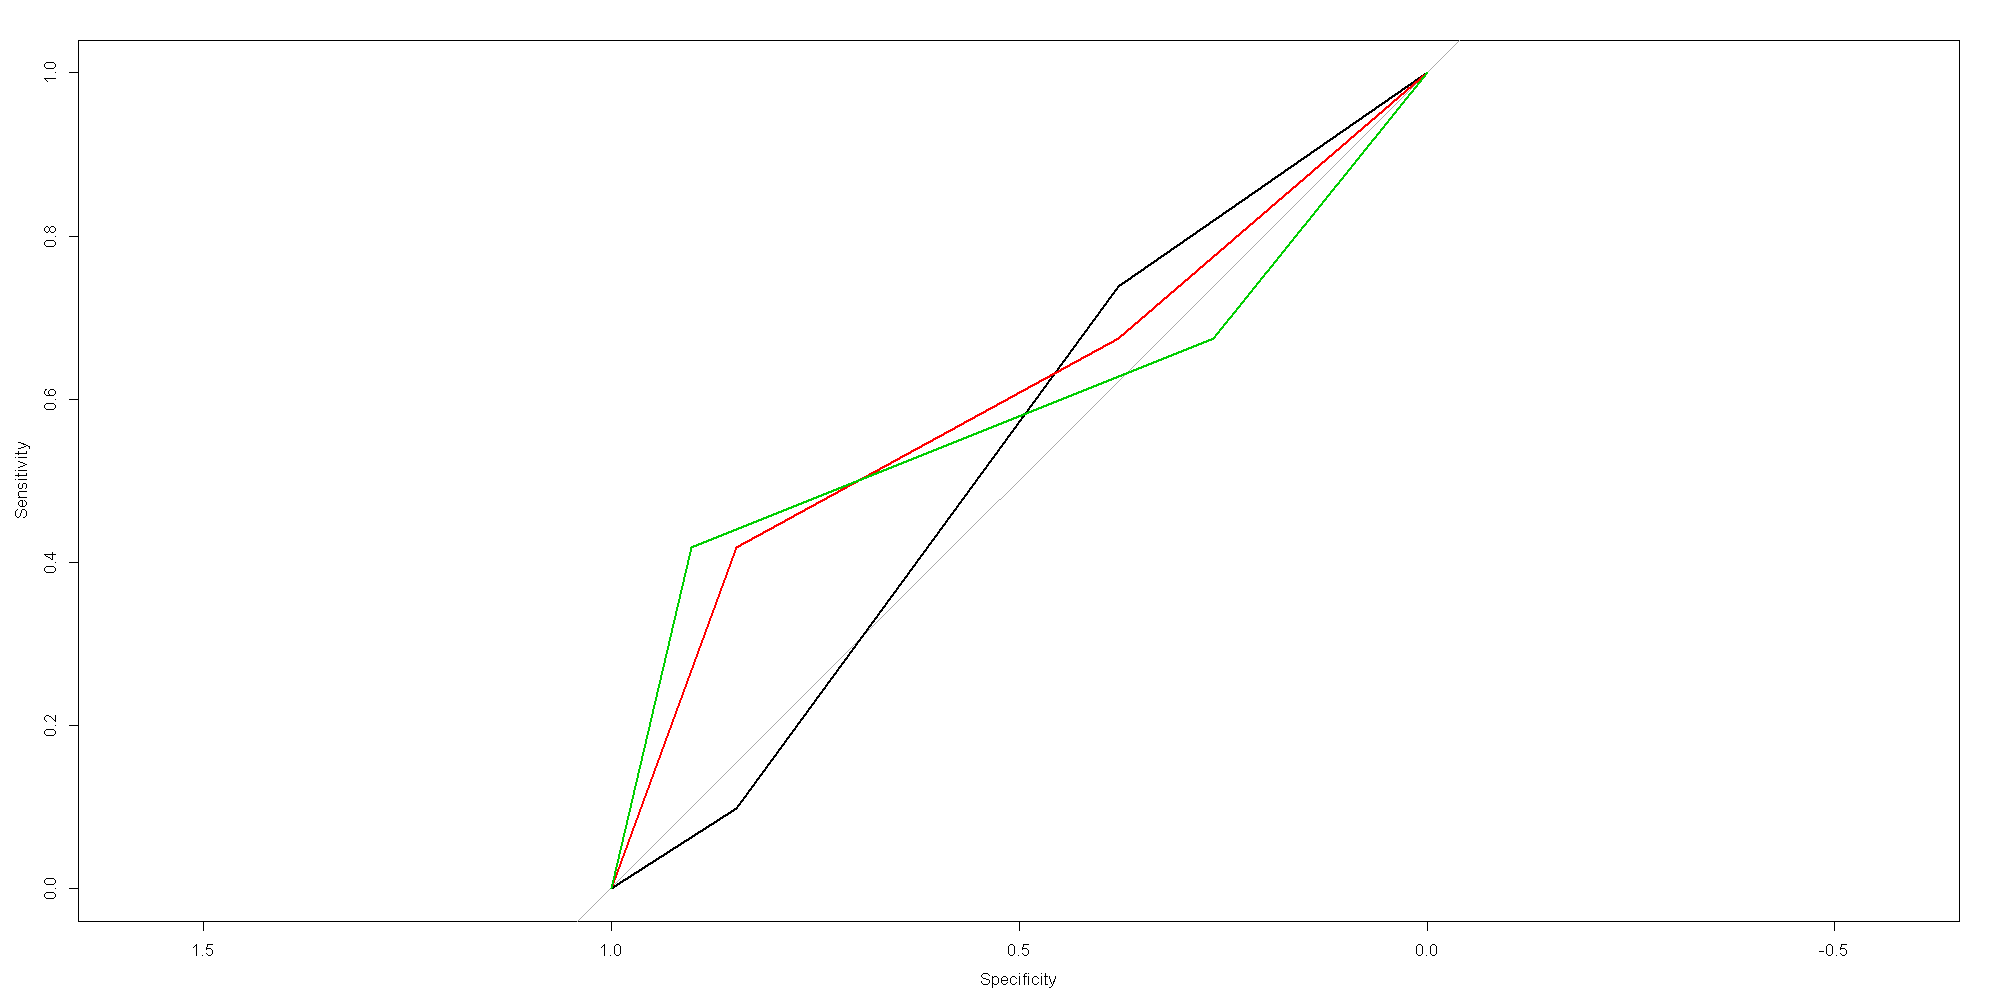

In [13]:
rs <- roc_svmMlpW[['rocs']]
plot.roc(rs[[1]])
sapply(2:length(rs),function(i) lines.roc(rs[[i]],col=i))

In [14]:
pred_svmMlpW.prob

,Accettabile,Complicato,Ottimo
NA.682,0.0012327372,1.819208e-02,9.732478e-01
NA.2538,0.0519853607,9.909014e-01,7.742702e-08
NA.2555,0.7118951678,1.458769e-01,5.315177e-05
NA.2671,0.3624383211,3.569495e-01,9.240074e-06
NA.2674,0.1047165394,8.949634e-01,1.506725e-04
NA.2943,0.4266266227,6.545482e-01,9.031173e-05
NA.11310,0.0484723002,2.356107e-04,9.058552e-01
NA.14010,0.9456999302,5.208302e-04,1.877974e-02
NA.14310,0.0011571766,1.772920e-02,9.751623e-01
NA.22010,0.0870914608,9.631751e-01,1.546984e-05
